"Exploratory Data Analysis for Final Project"
In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

A brief summary of the topic (a few sentences)
Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
Include a short written analysis of your interpretation of the data.
In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.


**I am interested in looking at how heat and other variables such as land cover and green spaces may interact with incidence of adverse pregnancy outcomes. This directly relates to my capstone project and I would like to have data vizualizations which show the spatial nature of the data.**

In [2]:
import requests


In [6]:
import requests
import json


api_url = "https://archive-api.open-meteo.com/v1/archive?latitude=37.8715&longitude=-122.2730&start_date=2024-03-08&end_date=2024-03-08&hourly=temperature_2m"

response = requests.get(api_url)

if response.status_code == 200:
    data = response.json()  

    hourly_temps = data.get('hourly', {}).get('temperature_2m', [])
    for i, temp in enumerate(hourly_temps):
        print(f"Hour {i}: {temp}°C")
else:
    print("didnt work:", response.status_code)



Hour 0: 15.1°C
Hour 1: 14.1°C
Hour 2: 12.0°C
Hour 3: 11.8°C
Hour 4: 10.4°C
Hour 5: 8.6°C
Hour 6: 8.1°C
Hour 7: 7.3°C
Hour 8: 6.7°C
Hour 9: 6.7°C
Hour 10: 6.2°C
Hour 11: 5.9°C
Hour 12: 5.8°C
Hour 13: 4.7°C
Hour 14: 4.8°C
Hour 15: 5.1°C
Hour 16: 8.5°C
Hour 17: 12.2°C
Hour 18: 14.1°C
Hour 19: 15.1°C
Hour 20: 16.0°C
Hour 21: 16.8°C
Hour 22: 17.2°C
Hour 23: 17.3°C


In [7]:
import pandas as pd

hours = range(24)
temperatures = [
    15.1, 14.1, 12.0, 11.8, 10.4, 8.6, 8.1, 7.3, 6.7, 6.7, 6.2, 5.9,
    5.8, 4.7, 4.8, 5.1, 8.5, 12.2, 14.1, 15.1, 16.0, 16.8, 17.2, 17.3
]

# Creating the DataFrame
df_temp = pd.DataFrame({'Hour': hours, 'Temperature (°C)': temperatures})

print(df_temp)


    Hour  Temperature (°C)
0      0              15.1
1      1              14.1
2      2              12.0
3      3              11.8
4      4              10.4
5      5               8.6
6      6               8.1
7      7               7.3
8      8               6.7
9      9               6.7
10    10               6.2
11    11               5.9
12    12               5.8
13    13               4.7
14    14               4.8
15    15               5.1
16    16               8.5
17    17              12.2
18    18              14.1
19    19              15.1
20    20              16.0
21    21              16.8
22    22              17.2
23    23              17.3


In [12]:
median_temp = df_temp['Temperature (°C)'].median()
df_temp['Temp Category'] = df_temp['Temperature (°C)'].apply(lambda x: 'warm temps' if x >= median_temp else 'lower temps')

summary_stats = df_temp.groupby('Temp Category')['Temperature (°C)'].agg(['mean', 'min', 'max', 'std'])

print(summary_stats)


                    mean   min   max       std
Temp Category                                 
lower temps     6.533333   4.7   8.6  1.372015
warm temps     14.341667  10.4  17.3  2.316917


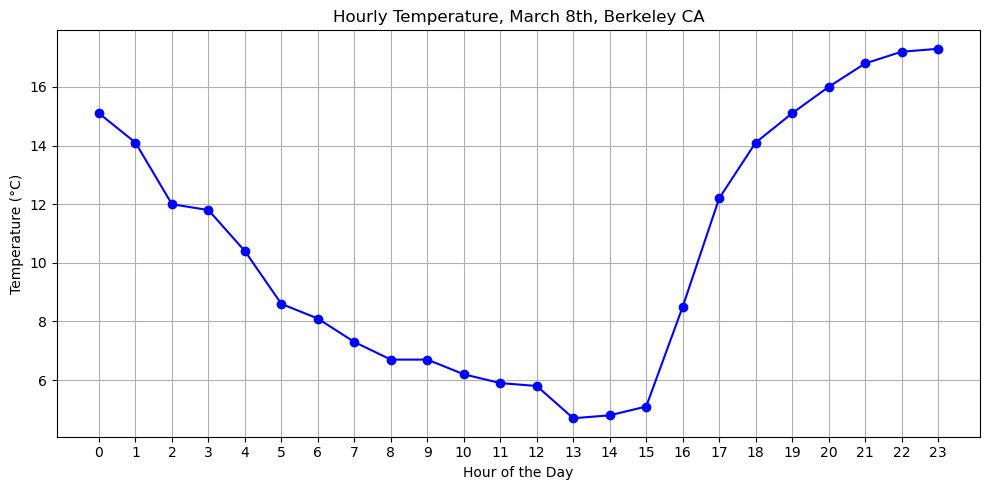

In [14]:
import matplotlib.pyplot as plt

# Plotting the hourly temperature as a line plot
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(df_temp['Hour'], df_temp['Temperature (°C)'], marker='o', linestyle='-', color='blue')
plt.title('Hourly Temperature, March 8th, Berkeley CA')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(range(0, 24, 1))  
plt.tight_layout()  
plt.show()


In [20]:

file_path = '/Users/gracerajan/Downloads/Pregnancy During the COVID-19 Pandemic.csv'

df_births = pd.read_csv(file_path)


df_cleaned = df_births.dropna(subset=['NICU_Stay', 'Gestational_Age_At_Birth'])

df_cleaned['NICU_Stay'] = df_cleaned['NICU_Stay'].map({'Yes': 1, 'No': 0})

print(df_cleaned.head())



pivot_table = df_cleaned.pivot_table(values='NICU_Stay', index='Gestational_Age_At_Birth', aggfunc='mean')
print(pivot_table)





   OSF_ID  Maternal_Age    Household_Income    Maternal_Education  \
0       1          38.3           $200,000+        Masters degree   
3       4          28.8  $100,000 -$124,999        Masters degree   
4       5          36.5     $40,000-$69,999  Undergraduate degree   
7       8           NaN                 NaN                   NaN   
8       9          33.1  $100,000 -$124,999  College/trade school   

   Edinburgh_Postnatal_Depression_Scale  PROMIS_Anxiety  \
0                                   9.0            13.0   
3                                   9.0            20.0   
4                                  14.0            20.0   
7                                   NaN             NaN   
8                                   1.0             7.0   

   Gestational_Age_At_Birth Delivery_Date(converted to month and year)  \
0                     39.71                                    Dec2020   
3                     38.57                                    Dec2020   
4       

/var/folders/j4/zrwn4m7909b7gmxmhw0gwsgm0000gq/T/ipykernel_68664/3987532182.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['NICU_Stay'] = df_cleaned['NICU_Stay'].map({'Yes': 1, 'No': 0})


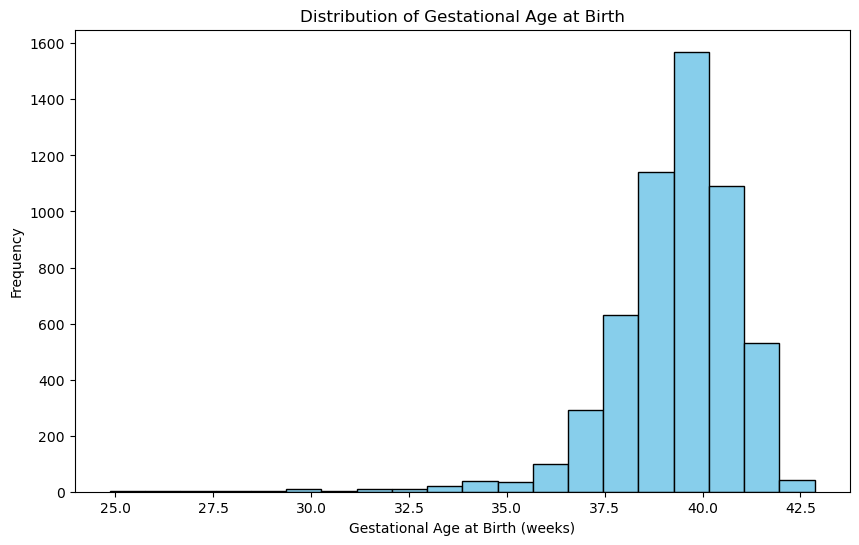

In [21]:
plt.figure(figsize=(10, 6))  
plt.hist(df_cleaned['Gestational_Age_At_Birth'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Gestational Age at Birth')
plt.xlabel('Gestational Age at Birth (weeks)')
plt.ylabel('Frequency')
plt.show()

**I have a dataset I am working on for my capstone which merges DHS geocoded data and records daily temerpature for each individual in my datasets pregnancy.I want to create data visualizations which show changes in temerpature over time and birth outcomes over time. I want to emphasize regional differences , showing how heat and adverse pregnancy outcomes interact with creating a dynamic visualzation showing the interplay between the two. For this assignment I have just illustrated the use of APIs and other hea;th datasets to look at the distribution of different types of data. The Berkeley temeprature data shows that there are clear day/night differences in temerpature. The distribution of births data shows that there is a slight right skew, indicating that there may be much more of a need to investigate why there are some births that are extremely preterm. My goal is to use my capstone dataset to present some visualizations that show changing patterns over time.**